# Home assignment 2 - Chanh Nguyen 1504202
Probability and Statistics   
CC BY-NC-SA, Sakari Lukkarinen   
Helsinki Metropolia University of Applied Sciences

In [144]:
%pylab inline
import numpy.random as random
import scipy.stats as stats
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Reliability analysis

The goal of this home assignment is to get familiar with reliability analysis of electronic devices. Common way to define the reliability of electronic devices is to measure the [Mean Time Before Failure (MTBF)](https://en.wikipedia.org/wiki/Mean_time_between_failures), which typically follows [the exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Exponential_pdf.svg/488px-Exponential_pdf.svg.png" alt="Probability density functions for exponential distributions for different expected values ($\lambda$)" style="Height:200px">
*<center>Figure 1: Probability density functions for exponential distributions.</center>*


You can simulate the MTBF by generating random numbers from exponential distribution. For more details how to do that, see for example: [scipy.stats.expon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).

A real life example data for MTBF analysis can found from Lumio's pages. In [the MTBF report](http://lumio.com/outgoing/Documentation/Certification_Regulation/MTBF_Report.pdf) they have theoretically analyzed the MTBF of their [two sensor optical touch system](http://www.lumio.com/Products/optical-touch.html).

Based on the report a sample MTBF data was generated. The data file contains 10,000 rows and 7 columns. You can read the data into Notebook with the following command.

In [134]:
df = pd.read_csv('http://users.metropolia.fi/~tommiluk/Notebooks/Statistics/lumio.csv')
df.head()

,Unnamed: 0,Bar1,Bar2,Bar3,Ledwire,Other,PCB,Sensor1,Sensor2
0,0,47738,16661,89340,35536256,1733151,5089363,118013,706649
1,1,25224,461960,207892,1288040,602050,6380622,135817,156081
2,2,264358,78382,34696,1965911,111334,711417,200020,258389
3,3,173766,60687,19159,5399647,653105,9282464,561615,309686
4,4,136754,236812,9762,24376764,2499409,265387,700599,496351


### To do

1. Draw histograms and calculate the basic descriptive statistics for each component.
2. Using `numpy.random.choice` select randomly only 100 samples from each column and calculate the sample mean, standard deviation and standard error for each column.
3. Based on the sample mean and standard error calculated in previous task, estimate what is the 95 % confidence interval for the mean MTBF for each component.
4. Estimate what is the mean MTBF of the whole system. We assume that if any of the components fails, then the whole system fails. You can model this situation by finding the minimum value for each row of the table and then by making the histogram for the minimum values and calculating the descriptive statistics.

###### 1.Draw histograms and calculate the basic descriptive statistics for each component.

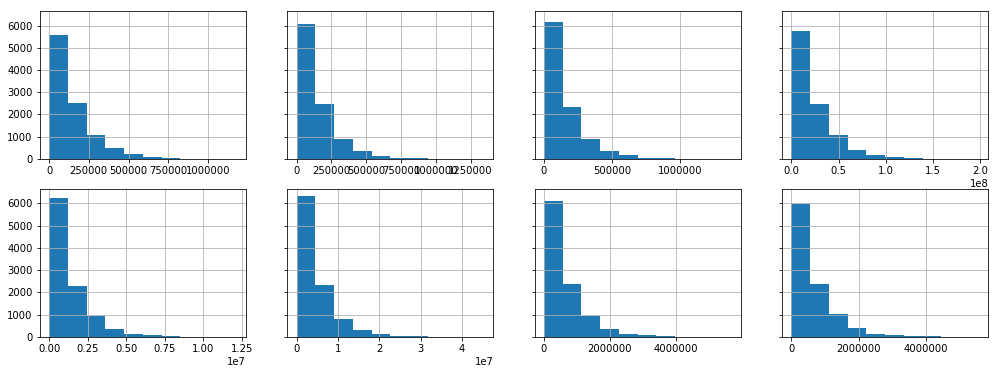

In [135]:
# Create a list of data components
data = [None]*8
data[0] = df['Bar1']
data[1] = df['Bar2']
data[2] = df['Bar3']
data[3] = df['Ledwire']
data[4] = df['Other']
data[5] = df['PCB']
data[6] = df['Sensor1']
data[7] = df['Sensor2']

fig,axes = plt.subplots(2,4,figsize=(17,6),sharey=True)
c = 0
for i in range(2):
    for k in range(4):
        axes[i][k].hist(data[c])
        axes[i][k].grid()
        c += 1

In [136]:
df.describe()

,Unnamed: 0,Bar1,Bar2,Bar3,Ledwire,Other,PCB,Sensor1,Sensor2
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,4999.50000,1.436702e+05,1.418828e+05,1.440420e+05,2.325788e+07,1.266864e+06,4.500215e+06,6.066229e+05,6.133862e+05
std,2886.89568,1.431291e+05,1.392456e+05,1.446179e+05,2.314970e+07,1.290932e+06,4.561019e+06,6.055939e+05,6.048200e+05
min,0.00000,9.000000e+00,5.000000e+00,3.000000e+00,3.474000e+03,1.730000e+02,2.510000e+02,0.000000e+00,1.600000e+01
25%,2499.75000,4.138550e+04,4.171975e+04,4.112525e+04,6.764800e+06,3.609638e+05,1.285868e+06,1.732325e+05,1.826025e+05
50%,4999.50000,9.897950e+04,1.001940e+05,9.949700e+04,1.616356e+07,8.595325e+05,3.112773e+06,4.207960e+05,4.242965e+05
75%,7499.25000,1.972270e+05,1.983455e+05,1.990285e+05,3.241773e+07,1.759768e+06,6.158641e+06,8.452835e+05,8.685908e+05
max,9999.00000,1.177700e+06,1.345937e+06,1.375031e+06,1.987486e+08,1.214497e+07,4.526654e+07,5.679563e+06,5.560738e+06


###### 2.Using numpy.random.choice select randomly only 100 samples from each column and calculate the sample mean, standard deviation and standard error for each column.

In [137]:
dataSample = [None]*8
dataSample_mean = [None]*8
dataSample_std = [None]*8
dataSample_se = [None]*8

# Number of samples
n = 100

print('index | mean | standard deviation | standard error')

for i in range(8):
    dataSample[i] = random.choice(data[i], n)
    dataSample_mean[i] = dataSample[i].mean()
    dataSample_std[i] = dataSample[i].std()
    dataSample_se[i] = dataSample_std[i]/sqrt(n)
    
    print(i, dataSample_mean[i], dataSample_std[i], dataSample_se[i])

index | mean | standard deviation | standard error
0 130133.89 127786.15014 12778.615014
1 124219.65 99522.4205657 9952.24205657
2 127353.13 115350.255071 11535.0255071
3 20674674.07 18817328.2196 1881732.82196
4 1333849.28 1507097.09424 150709.709424
5 3992650.59 4196069.69961 419606.969961
6 686991.98 649775.304146 64977.5304146
7 827377.98 868096.097634 86809.6097634


###### 3.Based on the sample mean and standard error calculated in previous task, estimate what is the 95 % confidence interval for the mean MTBF for each component.

In [138]:
print('index | lower bound | upper bound')
for i in range(8):
    print(i, dataSample_mean[i] - 1.96*dataSample_se[i], dataSample_mean[i] + 1.96*dataSample_se[i])

index | lower bound | upper bound
0 105087.804573 155179.975427
1 104713.255569 143726.044431
2 104744.480006 149961.779994
3 16986477.7389 24362870.4011
4 1038458.24953 1629240.31047
5 3170220.92888 4815080.25112
6 559636.020387 814347.939613
7 657231.144864 997524.815136


###### 4.Estimate what is the mean MTBF of the whole system. We assume that if any of the components fails, then the whole system fails. You can model this situation by finding the minimum value for each row of the table and then by making the histogram for the minimum values and calculating the descriptive statistics.

In [139]:
# Drop the column Unnamed: 0
df_copy = df.drop('Unnamed: 0', 1)
df_copy.head()

,Bar1,Bar2,Bar3,Ledwire,Other,PCB,Sensor1,Sensor2
0,47738,16661,89340,35536256,1733151,5089363,118013,706649
1,25224,461960,207892,1288040,602050,6380622,135817,156081
2,264358,78382,34696,1965911,111334,711417,200020,258389
3,173766,60687,19159,5399647,653105,9282464,561615,309686
4,136754,236812,9762,24376764,2499409,265387,700599,496351


In [140]:
minMTBF = df_copy.min(axis=1)
minMTBF.head()

0    16661
1    25224
2    34696
3    19159
4     9762
dtype: int64

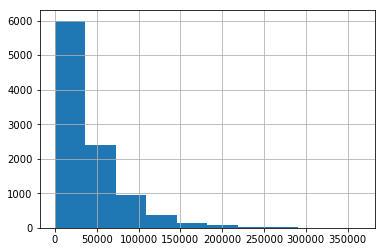

In [141]:
hist(minMTBF)
grid()

In [142]:
minMTBF.describe()

count     10000.000000
mean      39860.354200
std       39809.389378
min           0.000000
25%       11682.500000
50%       27611.000000
75%       55181.500000
max      363983.000000
dtype: float64